# 파이썬의 문자열 처리

<img src='images/string1.jpg' width=500 height=400>

In [1]:
site = 'web-is-free'
print(site.split('-'))
site = [ "web", "is", "free" ]
print("-".join(site))

['web', 'is', 'free']
web-is-free


In [2]:
import re
word = "JAVA   가나다 javascript Aa 가나다 AAaAaA123 %^&* 파이썬"
print(re.sub("A", "", word))
print(re.sub("a", "", word)) 
print(re.sub("Aa", "", word)) 
print(re.sub("(Aa){2}", "", word))
print(re.sub("[Aa]", "", word)) 

JV   가나다 javascript a 가나다 aa123 %^&* 파이썬
JAVA   가나다 jvscript A 가나다 AAAA123 %^&* 파이썬
JAVA   가나다 javascript  가나다 AA123 %^&* 파이썬
JAVA   가나다 javascript Aa 가나다 AA123 %^&* 파이썬
JV   가나다 jvscript  가나다 123 %^&* 파이썬


In [3]:
print(re.sub("[가-힣]", "", word))
print(re.sub("[^가-힣]", "", word))

JAVA    javascript Aa  AAaAaA123 %^&* 
가나다가나다파이썬


In [4]:
print(re.sub("[&^%*]", "", word))
print(re.sub("[^가-힣A-Za-z0-9\s]", "", word))

JAVA   가나다 javascript Aa 가나다 AAaAaA123  파이썬
JAVA   가나다 javascript Aa 가나다 AAaAaA123  파이썬


In [5]:
print(re.sub("[\w\s]", "", word)) # 워드(한글, 숫자, 영어)나 공백
print(re.sub("\s", "", word)) # 
print(re.sub("\d", "", word)) # 숫자인
print(re.sub("\D", "", word)) # 숫자가 아닌(대문자는 소문자 + not)

%^&*
JAVA가나다javascriptAa가나다AAaAaA123%^&*파이썬
JAVA   가나다 javascript Aa 가나다 AAaAaA %^&* 파이썬
123


In [6]:
print(re.sub("[^\w]", "", word)) # ^\w: 워드가 아닌
print(re.sub("\W", "", word)) # \W: 워드가 아닌

JAVA가나다javascriptAa가나다AAaAaA123파이썬
JAVA가나다javascriptAa가나다AAaAaA123파이썬


In [7]:
new_word = re.sub("[^가-힣\s]", "", word) # 한글과 공백만 남음
print(new_word)

   가나다   가나다   파이썬


In [8]:
new_word = re.sub("\s+", " ", new_word)
print(new_word)

 가나다 가나다 파이썬


In [10]:
print(new_word.strip()) # 앞뒤 공백

가나다 가나다 파이썬


# 파이썬으로 구현하는 텍스트 분석(자연어 처리)

-----

### 1. KoNLPy를 활용한 형태소 분석
### 2. 워드 클라우드
### 3. 한국어 기반의 자연어 처리 모듈 - nltk
### 4. 텍스트 전처리
### 5. 카운트 기반의 단어 표현
### 6. 한글 자모 분해와 결합

## KoNLPy : 한국어 정보처리를 위한 파이썬 패키지 (https://konlpy.org/ko/latest/)

## 1. koNLPy를 활용한 형태소 분석

In [11]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
import pandas as pd
import numpy as np 

In [14]:
kkma = Kkma()

In [15]:
pprint(kkma.sentences('네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [16]:
pprint(kkma.nouns('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))


['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [17]:
pprint(kkma.pos('오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))

[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]


### [형태소 분석기 비교]

In [18]:
sample = '이것은 형태소 분석기 입니다 아버지가방에들어가신다'

In [19]:
from konlpy.tag import Hannanum  
hannanum = Hannanum() 
pprint(hannanum.nouns(sample))
pprint(hannanum.morphs(sample))
pprint(hannanum.pos(sample))

['이것', '형태소', '분석기', '아버지가방에들어가']
['이것', '은', '형태소', '분석기', '일', 'ㅂ니다', '아버지가방에들어가', '이', '시ㄴ다']
[('이것', 'N'),
 ('은', 'J'),
 ('형태소', 'N'),
 ('분석기', 'N'),
 ('일', 'P'),
 ('ㅂ니다', 'E'),
 ('아버지가방에들어가', 'N'),
 ('이', 'J'),
 ('시ㄴ다', 'E')]


In [20]:
kkma = Kkma() 
pprint(kkma.nouns(sample))
pprint(kkma.morphs(sample))
pprint(kkma.pos(sample))

['이것', '형태소', '분석기', '아버지', '아버지가방', '가방']
['이것', '은', '형태소', '분석기', '이', 'ㅂ니다', '아버지', '가방', '에', '들어가', '시', 'ㄴ다']
[('이것', 'NP'),
 ('은', 'JX'),
 ('형태소', 'NNG'),
 ('분석기', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]


In [21]:
from konlpy.tag import Okt                                 
okt = Okt()
pprint(okt.nouns(sample))
pprint(okt.morphs(sample))
pprint(okt.pos(sample))

['것', '형태소', '분석', '기', '아버지', '가방']
['이', '것', '은', '형태소', '분석', '기', '입니다', '아버지', '가방', '에', '들어가신다']
[('이', 'Determiner'),
 ('것', 'Noun'),
 ('은', 'Josa'),
 ('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('기', 'Noun'),
 ('입니다', 'Adjective'),
 ('아버지', 'Noun'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]


In [26]:
from konlpy.tag import Komoran                    
komoran = Komoran()
pprint(komoran.nouns(sample))
pprint(komoran.morphs(sample))
pprint(komoran.pos(sample))

['형태소', '분석기', '아버지', '가방']
['이것', '은', '형태소', '분석기', '이', 'ㅂ니다', '아버지', '가방', '에', '들어가', '시', 'ㄴ다']
[('이것', 'NP'),
 ('은', 'JX'),
 ('형태소', 'NNP'),
 ('분석기', 'NNG'),
 ('이', 'VV'),
 ('ㅂ니다', 'EC'),
 ('아버지', 'NNG'),
 ('가방', 'NNP'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EC')]


In [22]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [23]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [24]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [27]:
komoran.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [28]:
tagsets = pd.DataFrame()                            ## 빈 데이터프레임을 만든다. 
N = 67
                                                   ##  한글 형태소 분석기에 있는 품사에 대한 정보를 데이터프레임에 넣는다. 
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))

In [ ]:
display(tagsets.head(N))

## 2. 워드 클라우드

In [29]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [30]:
from wordcloud import WordCloud            ## 워드 클라우드 모듈을 사용한다 
import matplotlib.pyplot as plt 

In [31]:
myfontpath = "data/THEdog.ttf" 

In [32]:
wc = WordCloud(                        ## 워드클라우드 객체를 만들때 한글로 출력되도록 객체를 만든다 
    font_path = myfontpath,
    width = 200,
    height = 200
)

In [33]:
text = "둘리 도우너 또치 마이콜 희동이 둘리 둘리 도우너 또치 토토로 둘리 올라프 토토로 올라프 올라프"

In [34]:
wc = wc.generate(text)   
wc.to_file('output/ptest2.png')

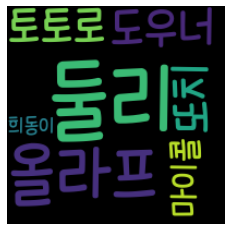

In [35]:
fig = plt.figure()
plt.imshow(wc, interpolation='bilinear')               ## 워드 클라우드 이미지로 출력한다 
plt.axis('off')
plt.show()

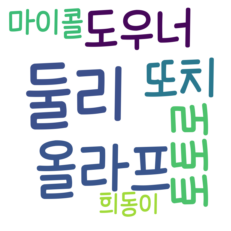

In [36]:
wc = WordCloud(
    font_path = myfontpath,
    background_color='white',                     ## 배경색을 지정한다 
    width = 800,
    height = 800
)
wc = wc.generate(text)
fig = plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

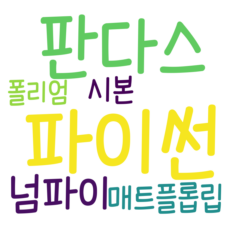

In [37]:
keywords = {'파이썬':7, '넘파이':3, '판다스':5, '매트플롭립':2, '시본':2, '폴리엄':2}             ## 특정 단어의 빈도를 딕셔너리로 만든다 

wc = wc.generate_from_frequencies(keywords)        ## 빈도별로 워드클라우드를 만든다 

fig = plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
from PIL import Image                                ## 이미지 파일을 처리하는 모듈을 사용한다. 
import numpy as np

In [39]:
r2d2_mask = np.array(Image.open('data/r2d2.JPG'))       ## 이미지를 읽어와서 다차원 배열로 변환한다 

In [40]:
from wordcloud import STOPWORDS  

In [41]:
stopwords = set()                               ## 한글은 별도로 집합으로 불용어를 만든다 
stopwords.add("은")
stopwords.add("입니다")
stopwords.add("것인가")
stopwords.add("처럼")

wc = WordCloud( stopwords=stopwords,              ## 워드 클라우드 객체를 만든다 
                          font_path = myfontpath,
                          background_color='white',
                           width = 800,
                           height = 800,
                          mask=r2d2_mask)            ## 마스크 인자에 이미지를 전달한다 

In [42]:
texts = ['로봇 처럼 표시하는 것을 보기 위해 이것 은 예문 입니다 가을이라 겨울 바람 솔솔 불어오니 ',
         '여러분 의 문장을 넣 으세요 ㅎㅎㅎ 스타워즈 영화에 나오는 다양한 로봇처럼 r2d2']

In [43]:
wc = wc.generate_from_text(texts[0]+texts[1])    ## 두 개의 문자을 연결해서 워드클라우드를 만든다 
wc

In [44]:
wc.to_file('output/ptest3.png')

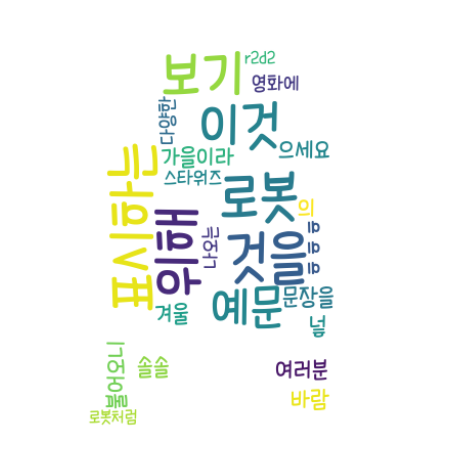

In [45]:
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")         ## 이미지를 출력하면 전달된 모양에 따라 표시한다 
plt.axis("off")
plt.show()

## 3. 한국어 기반의 자연어 처리 모듈 : nltk

In [46]:
import nltk                     ## 한국어 자연어처리 모듈 

In [47]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()

In [48]:
files_ko

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [49]:
doc_ko = kobill.open('1809898.txt').read()         ## 특정 텍스트 파일을 읽어온다 

In [50]:
doc_ko

"국군부대의 소말리아 해역 파견연장 동의안\n\n의안\n                                                                  제출연월일 :  2010.    11.    15.\n9898\n번호\n                                                                        제  출  자 :  정         부\n\n제안이유\n\n      소말리아 아덴만 해역에 파견된 국군부대 ( 청해부대 )의 파견기간이 \n2010년 12월 31일 종료될 예정이나,  다음 이유로 파견기간을 연장\n하고자 함. \n\n      첫째,  소말리아 해적활동으로 우리 선박의 안전이 위협을 받고 있고,\n\n      둘째,  청해부대가  성공적으로 임무를 수행하여 우리 국익보호 및  국위\n선양에 기여하고 있으며,   \n\n      셋째,  국내외 관계기관에서 파견연장을 요청하고 있음.\n\n주요내용\n\n    가. 유엔 안보리 결의 ( 1373/1838/1846/1851 )에 근거,  소말리아 아덴만 \n해역에 파견된 국군부대의 파견기간을 2011년 1월 1일부터 2011년 \n12월 31일까지 연장함.\n\n    나. 국군부대의 임무는 연합해군사의 해양안보작전에 참여하고,  우리 \n선박의 안전한 활동을 지원하는 것임.\n\n    다. 부대 지휘권은 한국군이 보유하며,  우리 선박 호송 간 작전운용은\n          한국군이 통제하고 연합해군사의 해양안보작전에 참여할 경우 현지 \n사령관이  전술통제함. \n\n    라. 국군부대의 파견경비는 우리 정부의 부담으로 함. \n\n참고사항\n\n    가.  관련법령 :  헌법 제5조 제1항,  제60조 제2항\n    나.  예산조치 :  국회 동의 후 2011년도 예산안에 대한 국회 심의 \n과정에서 반영 추진\n\n    다.  합    의 :  기획재정부,  외교통상부와 합의되었음.\n\n- 1 -\n\n\

In [51]:
from konlpy.tag import Okt      
t = Okt()
tokens_ko = t.nouns(doc_ko)                ## 텍스트에서 명사를 추출한다. 
print(tokens_ko[:10])

['국군', '부대', '소말리아', '해역', '파견', '연장', '의안', '의안', '제출', '연월일']


In [52]:
nouns_text = nltk.Text(tokens_ko, name='국군부대의 소말리아 해역 파견연장 동의안')       ## 명사로 추출한 것을 텍스트 객체로 만든다 

In [53]:
nouns_text

<Text: 국군부대의 소말리아 해역 파견연장 동의안>

In [54]:
type(nouns_text)

nltk.text.Text

In [55]:
len(nouns_text.tokens)                         ##  명사로 분리된 개수를 확인한다 

640

In [56]:
len(set(nouns_text.tokens))                   ## 유일한 단어의 개수를 확인한다 

249

In [57]:
nouns_text.tokens[:10]

['국군', '부대', '소말리아', '해역', '파견', '연장', '의안', '의안', '제출', '연월일']

In [58]:
nouns_text.vocab()                    ## 동일한 단어의 발생 빈도를 확인한다. 

FreqDist({'파견': 31, '부대': 24, '소말리아': 18, '연장': 14, '국군': 13, '해역': 12, '의안': 11, '우리': 9, '유엔': 9, '척': 9, ...})

In [59]:
import matplotlib.pyplot as plt

In [60]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

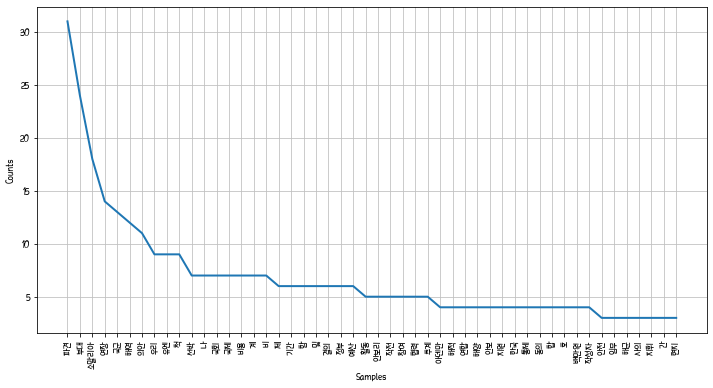

In [61]:
plt.figure(figsize=(12,6))
nouns_text.plot(50)                         ## 단어별로 발생빈도에 맞도록 그래프를 그린다. 

In [62]:
nouns_text.count('파견')                  ## 특정 단어의 발생빈도를 확인한다. 

31

In [63]:
nouns_text.count('소말리아')

18

In [64]:
nouns_text.concordance('소말리아')             ## 특정 단어가 있는 곳 리턴

Displaying 18 of 18 matches:
국군 부대 소말리아 해역 파견 연장 의안 의안 제출 연월일 번호 제 자 정 부 제안 
 파견 연장 의안 의안 제출 연월일 번호 제 자 정 부 제안 이유 소말리아 아덴만 해역 파견 국군 부대 청해부대 의 파견 기간 종료 예정 다
부대 의 파견 기간 종료 예정 다음 이유 파견 기간 연장 함 첫째 소말리아 해적 활동 우리 선박 안전 위협 둘째 청해부대 성공 임무 수행 우
여 국내외 관계 기관 파견 연장 요청 내용 유엔 안보리 결의 근거 소말리아 아덴만 해역 파견 국군 부대 파견 기간 장함 나 국군 부대 임무 
심의 과정 반영 추진 합 의 기획재정부 외교통상부 합의 국군 부대 소말리아 해역 파견 연장 의안 헌법 제 항의 규정 소말리아 아덴만 해역 파
합의 국군 부대 소말리아 해역 파견 연장 의안 헌법 제 항의 규정 소말리아 아덴만 해역 파견 국군 부대 파견 기간 연장 동의 국군 부대 파견
 방지 및 지원 차단 위 협력 국 협력 촉구 유엔 안보리 결의 호 소말리아 과도정부 출범 이후 무 정부 상태 지속 부터 소말리아 해역 해적 
리 결의 호 소말리아 과도정부 출범 이후 무 정부 상태 지속 부터 소말리아 해역 해적 활동 급증 선박 피랍 척 척 척 척 척 유엔 소말리아 
 소말리아 해역 해적 활동 급증 선박 피랍 척 척 척 척 척 유엔 소말리아 해적 퇴치 위해 회원 국 군함 및 항공기 참여 요청 유엔 안보리 
 합동 실 사단 파견 바레인 지부티 유엔 외국 정부 및 지역 기구 소말리아 영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해
 및 지역 기구 소말리아 영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해 소말리아 내 모든 조치 취할 수 승인 유엔 안보리
영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해 소말리아 내 모든 조치 취할 수 승인 유엔 안보리 결의 호 파견 의안 국회
회 가결 부대 파견 파견 연장 의안 국회 가결 국무회의 국군 부대 소말리아 해역 파견 연장 의안 

In [65]:
data = nouns_text.vocab().most_common(150)                 ## 가장 많이 발생한 단어를 선택한다. 

In [66]:
print(data)

[('파견', 31), ('부대', 24), ('소말리아', 18), ('연장', 14), ('국군', 13), ('해역', 12), ('의안', 11), ('우리', 9), ('유엔', 9), ('척', 9), ('선박', 7), ('나', 7), ('국회', 7), ('국제', 7), ('비용', 7), ('계', 7), ('비', 7), ('제', 6), ('기간', 6), ('함', 6), ('및', 6), ('결의', 6), ('정부', 6), ('예산', 6), ('활동', 5), ('안보리', 5), ('작전', 5), ('참여', 5), ('협력', 5), ('추계', 5), ('아덴만', 4), ('해적', 4), ('연합', 4), ('해양', 4), ('안보', 4), ('지원', 4), ('한국', 4), ('통제', 4), ('동의', 4), ('합', 4), ('호', 4), ('백만원', 4), ('작성자', 4), ('안전', 3), ('임무', 3), ('해군', 3), ('사의', 3), ('지휘', 3), ('간', 3), ('현지', 3), ('조치', 3), ('심의', 3), ('테러', 3), ('위', 3), ('이후', 3), ('위해', 3), ('수', 3), ('계획', 3), ('단위', 3), ('연', 3), ('구', 3), ('분', 3), ('국방부', 3), ('평화', 3), ('재원', 3), ('이유', 2), ('청해부대', 2), ('의', 2), ('예정', 2), ('요청', 2), ('근거', 2), ('보유', 2), ('호송', 2), ('운용', 2), ('경우', 2), ('사령관', 2), ('전술', 2), ('경비', 2), ('부담', 2), ('사항', 2), ('헌법', 2), ('항', 2), ('후', 2), ('예산안', 2), ('대한', 2), ('과정', 2), ('반영', 2), ('추진', 2), ('기획재정부', 2), ('목적', 2), ('경과',

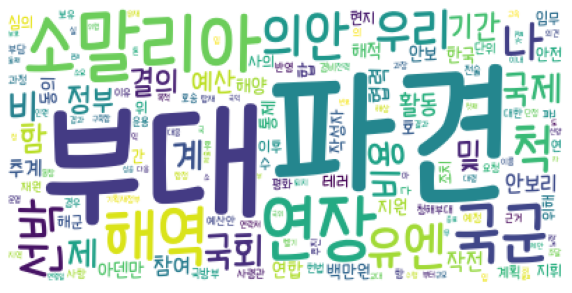

In [67]:
wc = WordCloud(font_path=myfontpath,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

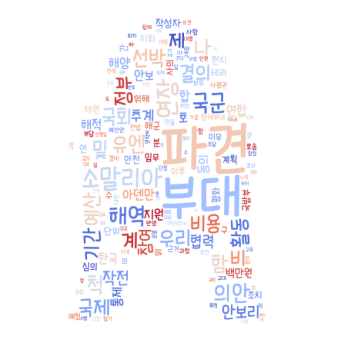

In [68]:
wc = WordCloud(font_path=myfontpath,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      colormap = 'coolwarm',
                      mask=r2d2_mask
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

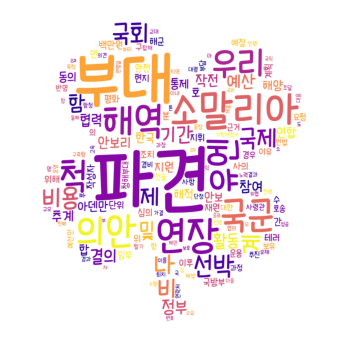

In [69]:
wc = WordCloud(font_path=myfontpath,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      colormap = 'plasma',
                      mask=np.array(Image.open('images/clover.jpg'))
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

In [ ]:
?WordCloud

## 4. 텍스트 전처리

### **한국어 전처리 패키지 : PyKoSpacing & Py-Hanspell**
#### 전희원님이 개발한 PyKoSpacing은 한국어 띄어쓰기 패키지로 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지이다. PyKoSpacing은 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델로 준수한 성능을 가지고 있다.

##### pip install git+https://github.com/haven-jeon/PyKoSpacing.git
##### pip install git+https://github.com/ssut/py-hanspell.git

In [70]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [71]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [72]:
from pykospacing import spacing

kospacing_sent = spacing(new_sent)
print(sent)
print(kospacing_sent)

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


In [73]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [74]:
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
print(kospacing_sent) 

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


## 5. 카운트 기반의 단어 표현

### 토큰화 : 주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 한다.

#### 방법(1) - nltk 패키지의 word_tokenize() 사용

In [75]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haneu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [76]:
from nltk.tokenize import word_tokenize 

corpus = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
word_tokens1 = word_tokenize(corpus)
print(word_tokens1) 

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


#### 방법(2) - Okt 객체의 morphs() 사용

In [79]:
from konlpy.tag import Okt
t = Okt()  
corpus = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."  
word_tokens2 = t.morphs(corpus)  
print(word_tokens2)

['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']


In [80]:
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든 게 때"
stop_words = stop_words.split(' ')

result = [] 
for w in word_tokens1: 
    if w not in stop_words: 
        result.append(w) 

print(result)

['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '.', '삼겹살을', '구울', '때는', '중요한', '있지', '.']


In [81]:
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든 게 때"
stop_words = stop_words.split(' ')

result = [] 
for w in word_tokens2: 
    if w not in stop_words: 
        result.append(w) 

print(result)

['고기', '를', '구', '우려', '고', '안', '돼', '.', '고기', '라고', '다', '같은', '.', '삼겹살', '을', '구울', '는', '중요한', '있지', '.']


#### 방법(3) - Okt 객체의 nouns() 사용

In [82]:
from konlpy.tag import Okt
t = Okt()  
corpus = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."  
word_tokens3 = t.nouns(corpus)  
print(word_tokens3)

['고기', '우려', '안', '고기', '게', '삼겹살', '구울', '때', '게']


In [ ]:
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든 게 때"
stop_words = stop_words.split(' ')

result = [] 
for w in word_tokens3: 
    if w not in stop_words: 
        result.append(w) 

print(result)

In [ ]:
from konlpy.tag import Okt
t = Okt()  
corpus = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다"  
word_tokens3 = t.morphs(corpus)  
print(word_tokens3)
nouns_text = nltk.Text(word_tokens3)
nouns_text.vocab()   

### 한국어 불용어 참조 사이트 : https://www.ranks.nl/stopwords/korean
----

## 카운트 기반의 단어 표현

### Bag of Words란 단어들의 순서는 고려하지 않고, 단어들의 출현 빈도에만 집중하는 텍스트 데이터의 수치화 표현 방법
### DTM(또는 TDM)은 BoW 의 확장으로서 TF 방법과 TF_IDF 방식으로 생성 가능
### TF-IDF 는 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치를 주는 방법 

### 사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다"]
vector = CountVectorizer()
r = vector.fit_transform(corpus).toarray() # 
print(r) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(r.shape)
print(vector.vocabulary_)

[[1 1 1 1 1 1 1]]
(1, 7)
{'정부가': 6, '발표하는': 4, '물가상승률과': 2, '소비자가': 5, '느끼는': 0, '물가상승률은': 3, '다르다': 1}


In [84]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다"]
vector = CountVectorizer(stop_words=["정부가", "소비자가"])
r = vector.fit_transform(corpus).toarray()
print(r) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(r.shape)
print(vector.vocabulary_)

[[1 1 1 1 1]]
(1, 5)
{'발표하는': 4, '물가상승률과': 2, '느끼는': 0, '물가상승률은': 3, '다르다': 1}


In [85]:
import pandas as pd # 데이터프레임 사용을 위해

In [86]:
corpus = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 

In [87]:
vector = CountVectorizer()
dtm = vector.fit_transform(corpus).toarray()
print(dtm) # 열이 각각의 단어임
print(vector.vocabulary_) # 각 단어들의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


In [88]:
tf = pd.DataFrame(dtm, columns = vector.get_feature_names())
display(tf)

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
dtm = vector.fit_transform(corpus).toarray()
print(dtm)  # 다른 문서에도 그 단어가 있는지 확인
print(vector.vocabulary_) # 각 단어들의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


In [90]:
tfidf = pd.DataFrame(dtm, columns = vector.get_feature_names())
display(tfidf)

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
2,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
3,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


In [91]:
corpus = [
           "커피 파스타 치킨 샐러드 아이스크림",
           "커피 우동 소고기김밥 귤",
           "참치김밥 커피 오뎅",
           "샐러드 피자 파스타 콜라",
           "티라무슈 햄버거 콜라",
           "파스타 샐러드 커피"    
]
vector = CountVectorizer()
dtm = vector.fit_transform(corpus).toarray()
print(dtm) 
tf = pd.DataFrame(dtm, columns = vector.get_feature_names())
display(tf)

[[1 0 1 0 0 0 1 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 1 0 0]]


,샐러드,소고기김밥,아이스크림,오뎅,우동,참치김밥,치킨,커피,콜라,티라무슈,파스타,피자,햄버거
0,1,0,1,0,0,0,1,1,0,0,1,0,0
1,0,1,0,0,1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,0,1,1,0,0,1
5,1,0,0,0,0,0,0,1,0,0,1,0,0


In [92]:
com = dtm.T @ dtm  # 동시 출현횟수

In [93]:
comdf = pd.DataFrame(com, columns = vector.get_feature_names(), index = vector.get_feature_names())
display(comdf)

,샐러드,소고기김밥,아이스크림,오뎅,우동,참치김밥,치킨,커피,콜라,티라무슈,파스타,피자,햄버거
샐러드,3,0,1,0,0,0,1,2,1,0,3,1,0
소고기김밥,0,1,0,0,1,0,0,1,0,0,0,0,0
아이스크림,1,0,1,0,0,0,1,1,0,0,1,0,0
오뎅,0,0,0,1,0,1,0,1,0,0,0,0,0
우동,0,1,0,0,1,0,0,1,0,0,0,0,0
참치김밥,0,0,0,1,0,1,0,1,0,0,0,0,0
치킨,1,0,1,0,0,0,1,1,0,0,1,0,0
커피,2,1,1,1,1,1,1,4,0,0,2,0,0
콜라,1,0,0,0,0,0,0,0,2,1,1,1,1
티라무슈,0,0,0,0,0,0,0,0,1,1,0,0,1


In [94]:
d1 = "aaa bbb ccc"
d2 = "aaa bbb ddd"
d3 = "aaa bbb ccc"
d4 = "xxx yyy zzz"
dd = [d1, d2, d3, d4]

In [95]:
vector = CountVectorizer()
dtm = vector.fit_transform(dd).toarray()
print(dtm) 
print(vector.vocabulary_)

[[1 1 1 0 0 0 0]
 [1 1 0 1 0 0 0]
 [1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1]]
{'aaa': 0, 'bbb': 1, 'ccc': 2, 'ddd': 3, 'xxx': 4, 'yyy': 5, 'zzz': 6}


In [96]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(dtm, dtm)
print(similarity_simple_pair)


[[1.         0.66666667 1.         0.        ]
 [0.66666667 1.         0.66666667 0.        ]
 [1.         0.66666667 1.         0.        ]
 [0.         0.         0.         1.        ]]


## 5. 한글 자모 분해와 결합

In [97]:
import hgtk                      ## 한글의 자음과 모음을 분리하는 모듈을 사용한다 

### 한글 자모 분해, 조합(오토마타), 조사 붙이기, 초/중/종 분해조합, 한글/한자/영문 여부 체크 등을 지원합니다.

In [98]:
hgtk.letter.decompose('감')          ## 특정 글자를 분리하면 초성 중성 종성으로 분리된다 

('ㄱ', 'ㅏ', 'ㅁ')

In [99]:
hgtk.letter.compose('ㄱ', 'ㅏ', 'ㅁ')      ## 분리된 글자를 하나의 글자로 합친다. 

'감'

In [100]:
sample_text = '''타밀어는 드라비다어족의 남부 계통, 즉 남부드라비다어파에 속하는 언어이다.
공식어로 지정된 인도의 주요 언어 중에서 타밀어와 계통적으로 가장 가까운 것은 말라얄람어인데, 
9세기 무렵까지 말라얄람어는 타밀어의 방언이었다.
이 두 언어 간에는 선사 시대에 일어난 서부 방언(말라얄람어의 원형) 분열의 증거가 되는 많은 차이가 있지만, 
13~14세기 무렵까지도 두 언어는 완전히 서로 다른 언어로 분리되지 않은 채였다.'''

In [101]:
s = hgtk.text.decompose(sample_text)        ## 여러 문장에 대해 단어를 분리한다. 

In [102]:
s[:40]

'ㅌㅏᴥㅁㅣㄹᴥㅇㅓᴥㄴㅡㄴᴥ ㄷㅡᴥㄹㅏᴥㅂㅣᴥㄷㅏᴥㅇㅓᴥㅈㅗㄱᴥㅇㅢᴥ ㄴㅏ'

In [103]:
hgtk.text.compose(s)[:40]                     ## 분리된 것을 하나로 합친다. 

'타밀어는 드라비다어족의 남부 계통, 즉 남부드라비다어파에 속하는 언어이다'

In [104]:
hgtk.checker.is_hangul('한글입니다')           ## 한글 여부를 확인한다 

True

In [105]:
hgtk.checker.is_hangul('no한글입니다')         ## 일부 영어가 들어가면 한글로 인식하지 않는다 

False

In [106]:
hgtk.checker.is_hangul('it is english')

False

In [107]:
hgtk.checker.is_hanja('大韓民國')                  ## 한자도 확인할 수 있다. 

True

In [108]:
hgtk.checker.is_hanja('大한민국')

False

In [109]:
hgtk.checker.is_hanja('대한민국')

False

## Josa
EUN_NEUN - 은/는

In [110]:
hgtk.josa.attach('하늘', hgtk.josa.EUN_NEUN)                 ## 단어에 맞는 조사를 붙여볼 수 있다. 

'하늘은'

In [111]:
hgtk.josa.attach('바다', hgtk.josa.EUN_NEUN)

'바다는'

In [112]:
hgtk.josa.attach('하늘', hgtk.josa.I_GA)

'하늘이'

In [113]:
hgtk.josa.attach('바다', hgtk.josa.I_GA)

'바다가'

In [114]:
hgtk.josa.attach('하늘', hgtk.josa.EUL_REUL)

'하늘을'

In [115]:
hgtk.josa.attach('바다', hgtk.josa.EUL_REUL)

'바다를'

In [116]:
from konlpy.tag import Okt
okt = Okt()

In [117]:
text = '태양계는 지금으로부터 약 46억 년 전, 거대한 분자 구름의 일부분이 중력 붕괴를 일으키면서 형성되었다'

okt.pos(text)

[('태양계', 'Noun'),
 ('는', 'Josa'),
 ('지금', 'Noun'),
 ('으로부터', 'Josa'),
 ('약', 'Noun'),
 ('46억', 'Number'),
 ('년', 'Noun'),
 ('전', 'Noun'),
 (',', 'Punctuation'),
 ('거대한', 'Adjective'),
 ('분자', 'Noun'),
 ('구름', 'Noun'),
 ('의', 'Josa'),
 ('일부분', 'Noun'),
 ('이', 'Josa'),
 ('중력', 'Noun'),
 ('붕괴', 'Noun'),
 ('를', 'Josa'),
 ('일으키면서', 'Verb'),
 ('형성', 'Noun'),
 ('되었다', 'Verb')]

In [118]:
okt.morphs(text)

['태양계',
 '는',
 '지금',
 '으로부터',
 '약',
 '46억',
 '년',
 '전',
 ',',
 '거대한',
 '분자',
 '구름',
 '의',
 '일부분',
 '이',
 '중력',
 '붕괴',
 '를',
 '일으키면서',
 '형성',
 '되었다']

In [119]:
okt.nouns(text)

['태양계', '지금', '약', '년', '전', '분자', '구름', '일부분', '중력', '붕괴', '형성']

## 한글 단어 분석을 위한 패키지 준비

In [120]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [122]:
filename = 'etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'
inputFileName = 'data/'+filename
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

### 1-2. 분석할 데이터 추출

In [123]:
message = ''

for item in data:
    if 'message' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
        
message #출력하여 내용 확인

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

### 1-3. 품사 태깅 : 명사 추출

In [124]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

['스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [125]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'스파크': 3,
         '포럼': 5,
         '미래': 3,
         '시대': 7,
         '조직': 4,
         '변화': 3,
         '시작': 1,
         '현': 1,
         '사회': 3,
         '문제': 1,
         '및': 1,
         '이슈': 2,
         '제기': 1,
         '그': 1,
         '혁신': 1,
         '해결': 1,
         '소셜': 2,
         '이노': 1,
         '베이': 1,
         '터': 4,
         '발굴': 1,
         '지원': 1,
         '우리': 2,
         '확산': 1,
         '위해': 2,
         '도전': 1,
         '만남': 1,
         '자리': 1,
         '차': 23,
         '산업혁명': 22,
         '기업': 3,
         '직문': 1,
         '실험': 1,
         '사례': 2,
         '통해': 4,
         '방향': 1,
         '생각': 1,
         '로봇': 3,
         '주요': 2,
         '성장': 1,
         '동력': 1,
         '국내': 2,
         '재': 1,
         '평가': 1,
         '분석': 1,
         '금융': 1,
         '산업': 10,
         '전반': 1,
         '점검': 1,
         '공통': 1,
         '간판': 1,
         '공약': 1,
         '선도': 1,
         '도시': 1,
         '구현': 1,
         '

In [126]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1


### 히스토그램

In [127]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

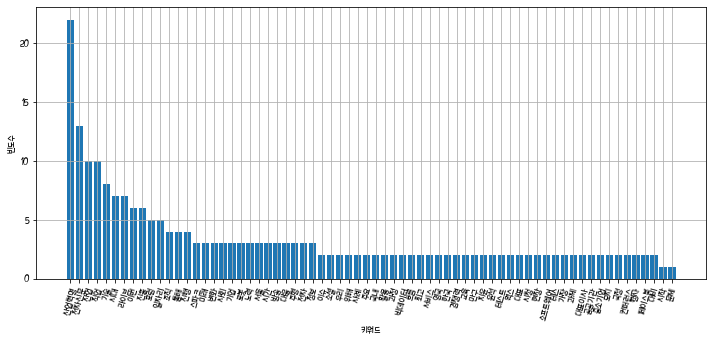

In [128]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

In [129]:
word_count

{'산업혁명': 22,
 '전자신문': 13,
 '산업': 10,
 '직업': 10,
 '기술': 8,
 '시대': 7,
 '라이브': 7,
 '이번': 6,
 '진흥': 6,
 '포럼': 5,
 '일자리': 5,
 '조직': 4,
 '통해': 4,
 '진행': 4,
 '스파크': 3,
 '미래': 3,
 '변화': 3,
 '사회': 3,
 '기업': 3,
 '로봇': 3,
 '노력': 3,
 '서울': 3,
 '시간': 3,
 '방송': 3,
 '대응': 3,
 '주형': 3,
 '전자': 3,
 '정보': 3,
 '이슈': 2,
 '소셜': 2,
 '우리': 2,
 '위해': 2,
 '사례': 2,
 '주요': 2,
 '국내': 2,
 '활용': 2,
 '과정': 2,
 '빅데이터': 2,
 '흐름': 2,
 '최고': 2,
 '서비스': 2,
 '영국': 2,
 '한국': 2,
 '경쟁력': 2,
 '교육': 2,
 '만구': 2,
 '지윤': 2,
 '윤석': 2,
 '테스트': 2,
 '웍스': 2,
 '대표': 2,
 '시청': 2,
 '현장': 2,
 '소프트웨어': 2,
 '테스': 2,
 '가장': 2,
 '과제': 2,
 '대표이사': 2,
 '공공기관': 2,
 '중소기업': 2,
 '모시': 2,
 '국정': 2,
 '컨퍼런스': 2,
 '행사': 2,
 '페이스북': 2,
 '대비': 2,
 '시작': 1,
 '문제': 1}

### 워드클라우드

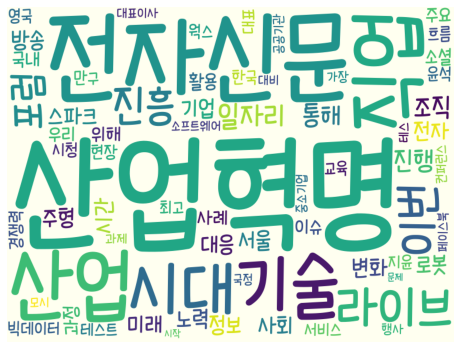

In [130]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()